# <span style='color:purple'> PROJECT : LOAN PREDICTION USING MACHINE LEARNING

import libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

load dataset


In [2]:
Loan = pd.read_csv("D:\\data_science_repo\\Load_Prediction\\Loan_Prediction.csv")

display frist five rows of each column

In [3]:
Loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
Loan['Total_Income'] = Loan['ApplicantIncome'] + Loan['CoapplicantIncome']

In [5]:
Load = Loan.drop({'ApplicantIncome', 'CoapplicantIncome','Loan_ID','Education'}, axis=1, inplace=True)

In [6]:
Loan.head()

,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,Male,Yes,0,No,110.0,360.0,1.0,Urban,5720
1,Male,Yes,1,No,126.0,360.0,1.0,Urban,4576
2,Male,Yes,2,No,208.0,360.0,1.0,Urban,6800
3,Male,Yes,2,No,100.0,360.0,NaN,Urban,4886
4,Male,No,0,No,78.0,360.0,1.0,Urban,3276


shows the information of the datset

In [7]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            356 non-null    object 
 1   Married           367 non-null    object 
 2   Dependents        357 non-null    object 
 3   Self_Employed     344 non-null    object 
 4   LoanAmount        362 non-null    float64
 5   Loan_Amount_Term  361 non-null    float64
 6   Credit_History    338 non-null    float64
 7   Property_Area     367 non-null    object 
 8   Total_Income      367 non-null    int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 25.9+ KB


display the relation between the data

In [8]:
Loan.describe()

,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
count,362.000000,361.000000,338.000000,367.000000
mean,136.132597,342.537396,0.825444,6375.177112
std,61.366652,65.156643,0.380150,5199.423594
min,28.000000,6.000000,0.000000,1760.000000
25%,100.250000,360.000000,1.000000,4156.000000
50%,125.000000,360.000000,1.000000,5205.000000
75%,158.000000,360.000000,1.000000,6980.000000
max,550.000000,480.000000,1.000000,72529.000000


check the null values present in the dataset

In [9]:
Loan.isna().sum()

Gender              11
Married              0
Dependents          10
Self_Employed       23
LoanAmount           5
Loan_Amount_Term     6
Credit_History      29
Property_Area        0
Total_Income         0
dtype: int64

## <span style='color:skyblue'> Data Preprocessing

In [10]:
#Handle categorical values in data
Loan["Gender"] = Loan["Gender"].fillna(Loan["Gender"].mode()[0])
Loan["Self_Employed"] = Loan["Self_Employed"].fillna(Loan["Self_Employed"].mode()[0])

In [11]:
Loan.head()

,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,Male,Yes,0,No,110.0,360.0,1.0,Urban,5720
1,Male,Yes,1,No,126.0,360.0,1.0,Urban,4576
2,Male,Yes,2,No,208.0,360.0,1.0,Urban,6800
3,Male,Yes,2,No,100.0,360.0,NaN,Urban,4886
4,Male,No,0,No,78.0,360.0,1.0,Urban,3276


In [12]:
# handle numerical data 

Loan["Credit_History"] = Loan["Credit_History"].fillna(Loan["Credit_History"].mean())
Loan["Loan_Amount_Term"] = Loan["Loan_Amount_Term"].fillna(Loan["Loan_Amount_Term"].mean())
Loan["LoanAmount"] = Loan["LoanAmount"].fillna(Loan["LoanAmount"].mean())



In [13]:
Loan.isna().sum()

Gender               0
Married              0
Dependents          10
Self_Employed        0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Total_Income         0
dtype: int64

<Axes: xlabel='Dependents', ylabel='count'>

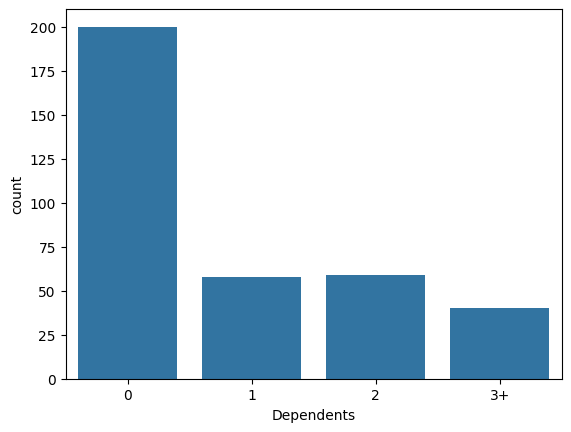

In [14]:
# handle missing values in Dependents column
sns.countplot(data = Loan, x="Dependents")

In [15]:
Loan["Dependents"] = Loan["Dependents"].fillna(0)

In [16]:
Loan.isna().sum()

Gender              0
Married             0
Dependents          0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Total_Income        0
dtype: int64

### <span style='color:skyblue'> Exploratory Data Analysis

<Axes: xlabel='Gender', ylabel='count'>

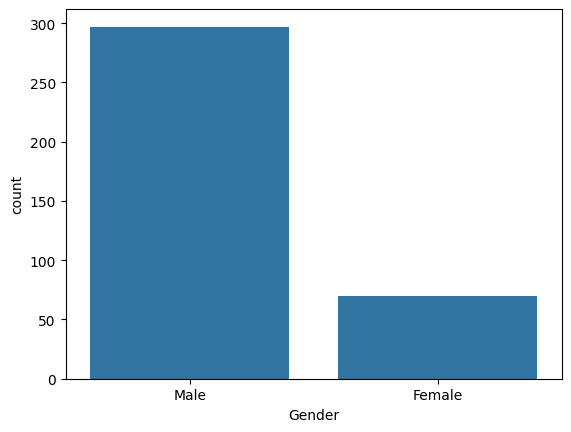

In [17]:
# categorical data
sns.countplot(data = Loan, x="Gender")

<Axes: xlabel='Self_Employed', ylabel='count'>

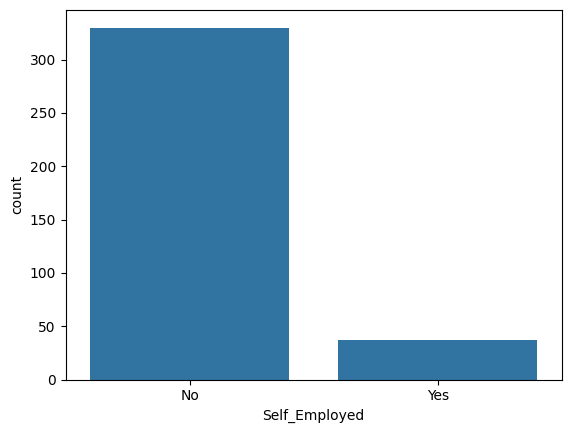

In [18]:
sns.countplot(data = Loan, x="Self_Employed")

In [19]:
Loan.columns

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Total_Income'],
      dtype='object')

<Axes: xlabel='LoanAmount', ylabel='Density'>

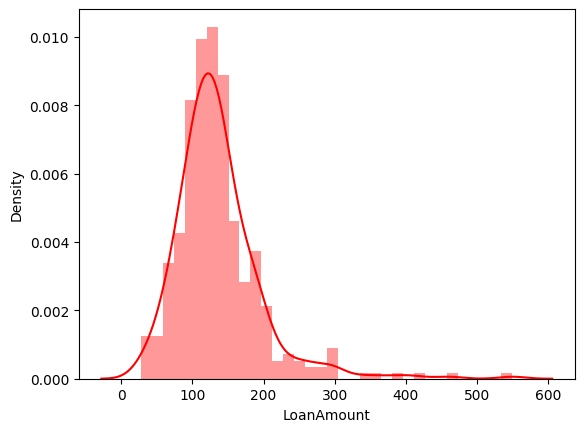

In [20]:
sns.distplot(Loan.LoanAmount, color='red')

<Axes: xlabel='Credit_History', ylabel='Density'>

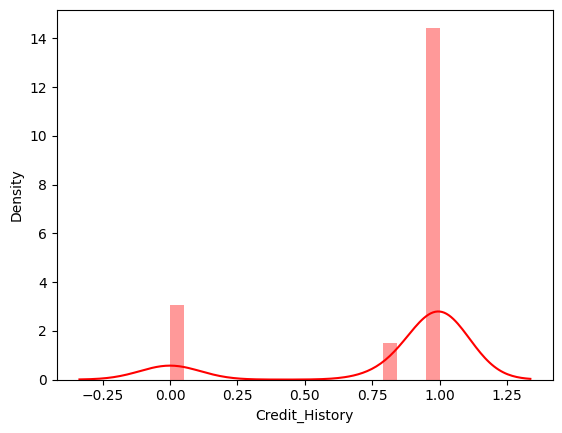

In [21]:
sns.distplot(Loan.Credit_History, color='red')

In [22]:
Loan['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [23]:
Loan['Gender'] = Loan['Gender'].replace({'Male':0,'Female':1})

Loan['Married'] = Loan['Married'].replace({'No':0,'Yes':1})

Loan['Property_Area'] = Loan['Property_Area'].replace({'Urban':0,'Semiurban':1,'Rural':2})

Loan['Dependents'] = Loan['Dependents'].replace(['0', '1', '2', '3+', 0],[0,1,2,3,0])

Loan['Self_Employed'] = Loan['Self_Employed'].replace({'No':0,'Yes':1})

In [24]:
Loan['LoanAmount'] = Loan['LoanAmount'].astype(int)
Loan['Loan_Amount_Term'] = Loan['Loan_Amount_Term'].astype(int)
Loan['Credit_History'] = Loan['Credit_History'].astype(int)

In [25]:
X = Loan[['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term',  'Property_Area', 'Total_Income']]
y = Loan['Credit_History']

#  <span style='color:skyblue'> Predicting Model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

###  <span style='color:green'> Logistic Regression

In [28]:
model = LogisticRegression()

In [29]:
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred = model.predict(X_test)

In [31]:
accuracy_score(y_test, y_pred)

0.7432432432432432

###  <span style='color:green'> SVM

In [32]:
from sklearn.svm import SVC

In [33]:
svc  = SVC()

In [34]:
svc.fit(X_train, y_train)

SVC()

In [35]:
svc_p = svc.predict(X_test)

In [36]:
accuracy_score(y_test, svc_p)

0.7432432432432432

### <span style='color:green'> Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc = RandomForestClassifier()

In [39]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
rfc_p = rfc.predict(X_test)

In [41]:
accuracy_score(y_test, rfc_p)

0.7432432432432432

###  <span style='color:green'> KNeighbours_Classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knc = KNeighborsClassifier()

In [44]:
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
knc_p = knc.predict(X_test)

In [46]:
accuracy_score(y_test, knc_p)

0.6621621621621622

In [47]:
confusion_matrix(y_test, svc_p)

array([[ 0, 19],
       [ 0, 55]])

Classification Algorithms                  |  Accuracy Score(%)  |           
----------------------------|---------------------
Logistic Regression         |  74
Support Vector Classifier   |  74
Random Forest Classifier    |  72
K_Neighbour Classifier      |  66

Logistic Regression and SVC provides the same accuracy of 74%

In [51]:
Loan_Final = {
    'Algorithms':['Logistic_Regression','Support_Vector_Classifier','Random_Forest_Classifier','KNeighbours_Classifier'],
    'Accuracy(%)':[74,74,72,66]
}

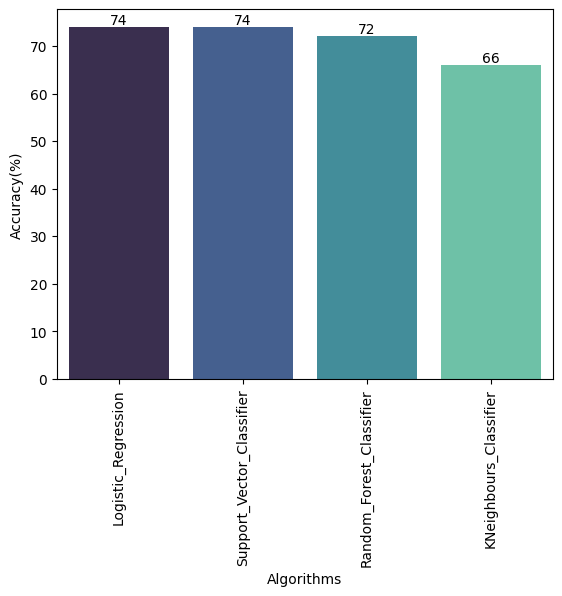

In [52]:
ax = sns.barplot(data=Loan_Final, x='Algorithms', y='Accuracy(%)', palette='mako')
for bars in ax.containers:
    ax.bar_label(bars)

plt.xticks(rotation=90)
plt.show()

In [50]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [55]:
for i in X_train:
    print(X_train[i][0])

0
1
0
0
110
360
0
5720
